## Neural network tutorial 


In [781]:
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd 


### Creating a neural network from scratch using numpy functions. 

In [541]:
## Digit recognition
data_train=pd.read_csv(r'C:\Users\Bowen\PycharmProjects\Machine learning\Digit_dataset\train.csv')
data_test=pd.read_csv(r'C:\Users\Bowen\PycharmProjects\Machine learning\Digit_dataset\test.csv')

In [542]:
data_train_array=np.array(data_train)
data_test_array=np.array(data_test)
np.random.shuffle(data_train_array)
np.random.shuffle(data_test_array)

In [543]:
data_train=data_train_array.T
data_test=data_test_array.T
Batch_size=420
### Training data 
y_label_train=data_train[0]
y_train_label=y_label_train[:Batch_size]
x_train=data_train[1:,:Batch_size]


In [691]:
image=x_train[:,:36].reshape(28,28,36)
images_dat=np.array(np.split(image,36, axis=2))
images_0=np.concatenate(images_dat[0:6],axis=1)
images_1=np.concatenate(images_dat[6:12],axis=1)
images_2=np.concatenate(images_dat[12:18],axis=1)
images_3=np.concatenate(images_dat[18:24],axis=1)
images_4 = np.concatenate(images_dat[24:30],axis=1)
images_5=np.concatenate(images_dat[30:36],axis=1)
image=np.vstack((images_0,images_1,images_2,images_3,images_4,images_5))

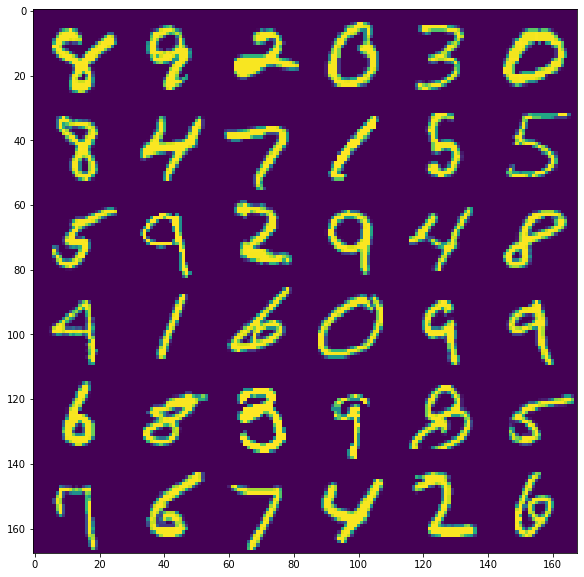

In [692]:
fig, ax= plt.subplots(1,1,figsize=(20, 10))
ax.imshow(image)
plt.show()


In [748]:
## One hot encodiing of the y label training dataset 
a = y_train_label
b = np.zeros((a.size, a.max() + 1))
b[np.arange(a.size), a] = 1

one_hot_y=b
actual_label=np.argmax(one_hot_y,axis=1)
print(actual_label)

[8 9 2 0 3 0 8 4 7 1 5 5 5 9 2 9 4 8 4 1 6 0 9 9 6 8 3 9 8 5 7 6 7 4 2 6 0
 9 7 4 9 7 2 6 6 6 2 2 4 9 3 1 3 5 9 9 5 0 7 0 3 2 2 1 5 7 1 8 8 8 2 4 5 1
 6 7 8 9 5 3 0 3 2 5 1 2 6 9 3 7 4 0 2 1 5 1 4 8 0 1 5 1 6 1 2 4 3 3 7 4 4
 6 5 7 3 9 6 4 2 5 7 1 9 7 4 3 5 6 4 3 3 7 9 8 8 2 1 7 3 4 4 7 6 1 8 1 5 2
 5 3 4 4 2 1 8 0 8 4 4 0 8 4 9 4 1 8 0 3 2 3 0 0 8 9 2 5 7 8 9 6 2 5 3 8 6
 0 6 0 0 6 1 9 4 8 9 8 5 2 4 8 3 7 4 9 3 9 9 8 5 3 0 6 6 9 9 6 6 8 7 4 8 0
 2 7 9 0 9 8 5 0 9 5 8 8 5 0 3 9 8 7 7 7 8 6 3 8 2 1 7 9 3 3 8 2 6 9 9 0 8
 7 0 3 4 3 9 1 2 4 6 2 3 9 6 8 0 0 7 1 9 9 7 2 5 5 2 5 5 7 3 8 2 7 6 8 7 3
 7 6 7 5 7 1 3 1 1 5 6 5 8 5 9 3 9 7 6 4 2 7 6 5 0 0 4 2 3 4 4 3 5 8 8 7 3
 0 9 1 1 6 1 5 2 8 1 2 5 3 0 9 3 5 4 6 2 8 4 9 4 7 0 8 8 9 7 4 5 3 9 3 0 3
 7 8 8 3 4 9 0 1 2 3 9 3 1 8 5 7 1 7 4 4 6 7 0 5 8 6 1 4 6 2 9 6 0 6 3 9 2
 2 2 3 4 2 1 3 7 1 7 3 1 2]


In [282]:
n,m= y_train_label.shape, x_train.shape

In [283]:
print(f"There are {n[0]} data labels for the training dataset")
print(f"There are {m[0]} pixels with {m[1]} training examples")

There are 420 data labels for the training dataset
There are 784 pixels with 420 training examples


In [488]:
import random
class layer_dense:
    def __init__(self, no_of_neurons,input_size,activation=None):
        self.seed=random.randint(0,100000)
        np.random.seed(self.seed)
        self.weights=np.random.randn(no_of_neurons,input_size)
        self.biases=np.random.randn(no_of_neurons,1)
        self.activation=activation
        
    def forward_pass(self,inputs):
        self.inputs=inputs
        linear_output=np.dot(self.weights,self.inputs)+self.biases
        if self.activation == "ReLU":
            activation_output = np.maximum(0, linear_output)
        elif self.activation == "tanh":
            activation_output = np.tanh(np.array(linear_output,dtype=np.float64))
        elif self.activation == "sigmoid":
            activation_output = 1 / (1 + np.exp(-linear_output))
        elif self.activation == "softmax":
            exp_scores = np.exp(linear_output)
            activation_output = exp_scores / np.sum(exp_scores, axis=0)
        else:
            activation_output = linear_output
        
        return activation_output
    
    def backward_prop(self, output_grad, learn_rate):
        weights_grad=np.dot(output_grad, self.inputs.T)
        input_grad = np.dot(self.weights.T, output_grad)
        self.weights=self.weights-learn_rate*weights_grad
        self.biases=self.biases-learn_rate*output_grad
        return input_grad


In [778]:
def cross_entropy_loss(target, predictions):
    inter=-target.T*np.log(predictions)
    loss = np.sum(inter)/target.shape[0]
    return loss

def activation_func_deriv(func_type,x):  ## x is the input
    if func_type=="tanh":
        function_deriv=1-np.tanh(x)**2   
    elif func_type=="ReLU":
        function_deriv=x>0    
    elif func_type=="sigmoid":
        function_deriv=np.exp(-x)/((1 + np.exp(-x))**2)   
    elif func_type=="softma x":
        function= np.exp(x)/np.sum(np.exp(x))
        function = function.reshape(-1,1)
        function_deriv=np.diagflat(s) - np.dot(function,  function.T)
    else:
         raise Exception("function choice not supported")
    return function_deriv


In [761]:
input_size = 784
hidden_size_1 = 100  ## Neurons in the first hidden layer
hidden_size_2 = 50  ## Neurons in the second hidden layer
output_size = 10    ## The number of neurons in the output layer for MNST classification

# Define the layers
layer1 = layer_dense(hidden_size_1, input_size, activation="ReLU")
layer2 = layer_dense(hidden_size_2, hidden_size_1, activation="tanh")
output_layer = layer_dense(output_size, hidden_size_2, activation="softmax")

# Forward pass through the network
hidden1_output = layer1.forward_pass(x_train)
hidden2_output=layer2.forward_pass(hidden1_output)
final_output = output_layer.forward_pass(hidden2_output)

In [779]:
res=final_output[:,:]
choice=np.argmax(res,axis=0)
print(choice)

[6 8 9 0 0 4 0 0 4 0 4 0 0 8 0 0 8 0 0 0 9 0 8 0 0 0 4 7 4 8 0 0 0 9 0 0 4
 7 0 0 0 4 0 0 0 0 0 0 2 0 4 0 2 0 0 0 0 0 0 0 0 0 9 0 4 8 0 8 4 0 0 7 0 0
 2 4 0 9 4 2 0 4 6 0 0 0 0 7 4 0 9 0 0 0 4 0 0 0 0 8 0 0 2 0 0 0 0 0 0 0 4
 0 0 0 0 7 8 0 0 0 7 0 0 0 0 4 0 0 8 0 4 4 4 1 0 0 0 0 8 0 4 4 9 0 0 0 0 0
 0 0 8 0 0 0 4 0 0 0 0 4 0 0 0 8 0 4 0 2 2 0 0 0 0 4 0 8 0 7 8 0 0 0 4 8 9
 0 0 0 0 8 0 0 0 4 0 0 0 0 0 4 2 4 7 0 4 7 0 4 0 0 0 0 0 7 0 2 8 0 6 0 0 9
 4 0 0 4 0 8 8 0 9 0 0 4 4 0 9 0 0 0 2 4 4 7 0 2 7 0 0 7 4 0 0 7 0 0 8 0 0
 2 0 8 0 0 0 0 0 8 0 0 4 4 8 8 4 0 0 0 4 0 8 0 4 0 9 0 9 0 4 0 4 8 0 4 0 0
 0 0 0 8 0 8 0 0 8 0 9 0 0 4 7 0 0 0 1 0 2 0 4 2 0 0 0 4 9 0 6 4 4 0 2 7 0
 0 0 0 0 2 0 0 0 4 0 0 4 4 4 0 0 4 0 0 9 0 7 8 4 0 0 4 0 0 0 9 4 0 0 0 0 4
 4 0 0 0 9 4 7 0 0 8 0 0 0 0 0 0 0 0 9 0 0 4 1 0 0 2 0 0 0 0 7 9 0 0 4 0 4
 9 4 0 9 0 0 4 0 0 7 0 0 0]


In [780]:
loss = cross_entropy_loss(one_hot_y,res)
print("Cross entropy loss:", loss)

Cross entropy loss: 13.253962879252416
